# Aggregations: Min, Max, and Everything In Between

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [11]:
import numpy as np

In [12]:
L = np.random.random(100)
L

array([0.22575667, 0.32818155, 0.89039627, 0.68798494, 0.92447484,
       0.2473992 , 0.6097896 , 0.74487878, 0.30317082, 0.01229078,
       0.10744463, 0.20960913, 0.51875909, 0.15373724, 0.87772242,
       0.47192175, 0.87154517, 0.3483158 , 0.59544567, 0.52289626,
       0.87666911, 0.06672014, 0.19266459, 0.93351148, 0.6887254 ,
       0.06456973, 0.37838153, 0.79022254, 0.74471628, 0.96721221,
       0.55982554, 0.18349538, 0.15374949, 0.98568924, 0.49590521,
       0.34380086, 0.23944111, 0.58375655, 0.14427759, 0.47342222,
       0.30357849, 0.51160184, 0.20724563, 0.99156743, 0.22241785,
       0.38869522, 0.41316292, 0.34633502, 0.02352498, 0.63983839,
       0.51687303, 0.12937589, 0.06836032, 0.62812575, 0.23878604,
       0.97813842, 0.66622366, 0.14729687, 0.70430468, 0.75633992,
       0.29993054, 0.8320192 , 0.78218501, 0.42756512, 0.66435163,
       0.72699494, 0.70632366, 0.97207103, 0.45278968, 0.96183068,
       0.59519733, 0.32503671, 0.46618889, 0.53372991, 0.91539

In [13]:
sum(L)

50.81205861229825

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [14]:
np.sum(L)

50.81205861229827

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [15]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

658 ms ± 267 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.58 ms ± 644 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Be careful, though: the ``sum`` function and the ``np.sum`` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions, as we will see in the following section.

## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [16]:
min(big_array), max(big_array)

(3.1817348955520686e-07, 0.9999996977687229)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [17]:
np.min(big_array), np.max(big_array)

(3.1817348955520686e-07, 0.9999996977687229)

In [18]:
%timeit min(big_array)
%timeit np.min(big_array)

308 ms ± 42.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.26 ms ± 116 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [19]:
print(big_array.min(), big_array.max(), big_array.sum())

3.1817348955520686e-07 0.9999996977687229 500201.05047680304


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [20]:
M = np.random.random((3, 4))
print(M)

[[0.46193787 0.4442308  0.44896754 0.33005817]
 [0.61036599 0.26413755 0.49994061 0.78738552]
 [0.05071709 0.40489858 0.44628274 0.63671006]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [21]:
np.sum(M)

5.385632514355997

In [22]:
M.sum()

5.385632514355997

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [23]:
M

array([[0.46193787, 0.4442308 , 0.44896754, 0.33005817],
       [0.61036599, 0.26413755, 0.49994061, 0.78738552],
       [0.05071709, 0.40489858, 0.44628274, 0.63671006]])

In [25]:
M.mean()

0.44880270952966644

In [27]:
np.mean(M)

0.44880270952966644

In [29]:
M.argmin()

8

In [28]:
M.min()

0.05071708542104292

In [30]:
M.argmin(axis=1) 

array([3, 1, 0], dtype=int64)

In [31]:
M.min(axis = 0)

array([0.05071709, 0.26413755, 0.44628274, 0.33005817])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [32]:
M.max(axis=1)

array([0.46193787, 0.78738552, 0.63671006])

The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.

## Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values:

We'll use the Pandas package, which we'll explore more fully in [Chapter 3](03.00-Introduction-to-Pandas.ipynb), to read the file and extract this information (note that the heights are measured in centimeters).

In [33]:
import numpy as np

In [35]:
import pandas as pd
data = pd.read_csv('president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [36]:
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


Now that we have this data array, we can compute a variety of summary statistics:

In [37]:
print("Average height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Average height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [38]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is 182 cm, or just shy of six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib (we'll discuss Matplotlib more fully in [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)). For example, this code generates the following chart:

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

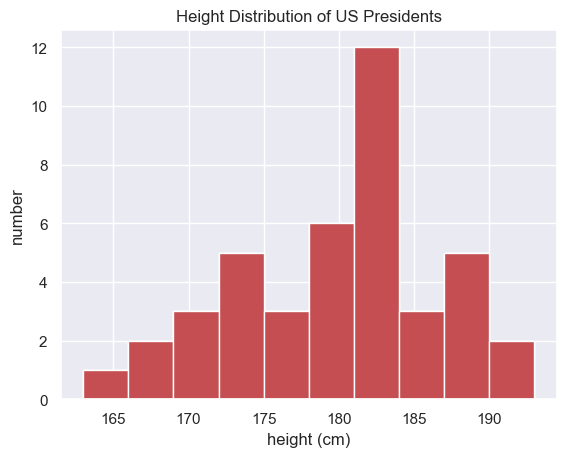

In [42]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')
plt.show();

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later module.

In [44]:
import numpy as np

arr = np.array([[1, 2], [3, 4]])
sum = np.sum(arr)
print("Sum of all elements:", sum)

mean_row = np.mean(arr, axis=1)
print("Mean of each row:", mean_row)

Sum of all elements: 10
Mean of each row: [1.5 3.5]


In [45]:
arr = np.array([10, 20, 30, 40, 50])
print(np.sum(arr))
print(np.min(arr))
print(np.max(arr))

150
10
50


In [46]:
#Basic Exercise
basic_arr = np.array([[1,2],[3,4]])
#calculate sum of all elements
np.sum(basic_arr)

10

In [47]:
arrayval.mean()

NameError: name 'arrayval' is not defined

In [48]:
import numpy as np;
arr1 = [10,20,30,40,50]
print("\n Sum: ", np.sum(arr1))
print("\n Min: ", np.min(arr1))
print("\n Max: ", np.max(arr1))


 Sum:  150

 Min:  10

 Max:  50


In [51]:
a=np.array([10, 20, 30, 40, 50])
print(a)

print(np.sum(a))

print(np.mean(a))

print(np.max(a))




a=np.array([[5, 10, 15], [20, 25, 30]])
print(a)


np.sum(a, axis=0)

np.min(a)
np.int64(5)



a=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(a)


print(np.sum(np.greater(a,5)))

print(np.mean(np.less(a,6)))

[10 20 30 40 50]
150
30.0
50
[[ 5 10 15]
 [20 25 30]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
4
0.5555555555555556


In [52]:
#Intermediate
import numpy as np

# Create a 2D array 
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Compute the standard deviation along rows (axis=1)
std_deviation_rows = np.std(arr, axis=1)
print("Standard deviation along rows:", std_deviation_rows)

# Compute the variance of the entire array
variance_elements = np.var(arr)
print("Variance of the entire array:", variance_elements)

Standard deviation along rows: [0.81649658 0.81649658 0.81649658]
Variance of the entire array: 6.666666666666667


In [ ]:
#Advance
import numpy as np

# Create a 2D array 
arr = np.array(list(range(1, 10))).reshape(3, 3)

# Compute the sum of elements greater than 5
sum = np.sum(arr[arr > 5])
print("Sum of elements greater than 5:", sum)

# Compute the mean of elements less than or equal to 5
mean = np.mean(arr[arr <= 5])
print("Mean of elements less than or equal to 5:", mean)

Sum of elements greater than 5: 30
Mean of elements less than or equal to 5: 3.0


## __Coding Exercises__

#### __1. Basic Exercise__

1. Create a 1D array with values [10, 20, 30, 40, 50].

    * Compute the sum, mean, and maximum value.

2. Create a 2D array with values [[1, 2], [3, 4]].

    * Compute the sum of all elements.

    * Compute the mean of each row.

#### __2. Intermediate Exercise__

1. Create a 2D array with values [[5, 10, 15], [20, 25, 30]].

    * Compute the sum along columns.

    * Compute the minimum value in the array.

2. Create a 2D array with values [[1, 2, 3], [4, 5, 6], [7, 8, 9]].

    * Compute the standard deviation along rows.

    * Compute the variance of the entire array.

#### __3. Advanced Exercise__

1. Create a 2D array with values [[1, 2, 3], [4, 5, 6], [7, 8, 9]].

    * Compute the sum of elements greater than 5.

    * Compute the mean of elements less than or equal to 5.

2. Create a 2D array with values [[10, 20, 30], [40, 50, 60], [70, 80, 90]].

    * Compute the maximum value along columns.

    * Compute the product of all elements.

## __Solutions to Exercises__

#### __1. Basic Solution__

In [1]:
import numpy as np

# Basic Exercise 1
arr = np.array([10, 20, 30, 40, 50])
print("Sum:", np.sum(arr))  # Output: 150
print("Mean:", np.mean(arr))  # Output: 30.0
print("Maximum:", np.max(arr))  # Output: 50

# Basic Exercise 2
arr_2d = np.array([[1, 2], [3, 4]])
print("Sum of all elements:", np.sum(arr_2d))  # Output: 10
print("Mean of each row:", np.mean(arr_2d, axis=1))  # Output: [1.5, 3.5]

Sum: 150
Mean: 30.0
Maximum: 50
Sum of all elements: 10
Mean of each row: [1.5 3.5]


#### __2. Intermediate Solution__

In [2]:
# Intermediate Exercise 3
arr_2d = np.array([[5, 10, 15], [20, 25, 30]])
print("Sum along columns:", np.sum(arr_2d, axis=0))  # Output: [25, 35, 45]
print("Minimum value:", np.min(arr_2d))  # Output: 5

# Intermediate Exercise 4
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("Standard deviation along rows:", np.std(arr_2d, axis=1))  # Output: [0.816, 0.816, 0.816]
print("Variance of the array:", np.var(arr_2d))  # Output: 6.666

Sum along columns: [25 35 45]
Minimum value: 5
Standard deviation along rows: [0.81649658 0.81649658 0.81649658]
Variance of the array: 6.666666666666667


#### __3. Advanced Solution__

In [3]:
# Advanced Exercise 5
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("Sum of elements greater than 5:", np.sum(arr_2d[arr_2d > 5]))  # Output: 30
print("Mean of elements less than or equal to 5:", np.mean(arr_2d[arr_2d <= 5]))  # Output: 3.0

# Advanced Exercise 6
arr_2d = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
print("Maximum along columns:", np.max(arr_2d, axis=0))  # Output: [70, 80, 90]
print("Product of all elements:", np.prod(arr_2d))  # Output: 362880000

Sum of elements greater than 5: 30
Mean of elements less than or equal to 5: 3.0
Maximum along columns: [70 80 90]
Product of all elements: -1786839040
